### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
vehicledata = pd.read_csv("..\\dataset\\vehicle.csv").dropna()
vehicledata.head()


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
vehicledata.head()
vehicledata.tail()
vehicledata.info()
vehicledata.shape
vehicledata.isnull().sum().sum()
vehicledata.isna().sum().sum()
vehicledata.describe().transpose()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car
845,85,36.0,66.0,123.0,55.0,5,120.0,56.0,17.0,128,140.0,212.0,131.0,73.0,1.0,18.0,186.0,190,van


<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

(813, 19)

0

0

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,93.656827,8.233751,73.0,87.0,93.0,100.0,119.0
circularity,813.0,44.803198,6.146659,33.0,40.0,44.0,49.0,59.0
distance_circularity,813.0,82.043050,15.783070,40.0,70.0,79.0,98.0,112.0
radius_ratio,813.0,169.098401,33.615402,104.0,141.0,167.0,195.0,333.0
pr.axis_aspect_ratio,813.0,61.774908,7.973000,47.0,57.0,61.0,65.0,138.0
max.length_aspect_ratio,813.0,8.599016,4.677174,2.0,7.0,8.0,10.0,55.0
scatter_ratio,813.0,168.563346,33.082186,112.0,146.0,157.0,198.0,265.0
elongatedness,813.0,40.988930,7.803380,26.0,33.0,43.0,46.0,61.0
pr.axis_rectangularity,813.0,20.558426,2.573184,17.0,19.0,20.0,23.0,29.0
max.length_rectangularity,813.0,147.891759,14.504648,118.0,137.0,146.0,159.0,188.0


### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [4]:
vehicledata['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

### Check for any missing values in the data 

In [5]:
vehicledata.isna().values.any()

False

### 3. Standardize the data 

In [6]:
vehicledata['class']=vehicledata["class"].replace({"car":1,"bus":2,"van":3})

In [7]:
vehicledata_z = vehicledata.apply(zscore)

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [8]:
vehicledata_z.head()
vehicledata_z.shape
vehicledata_z.describe().transpose()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837,1.542453
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318,1.542453
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596,-0.890164
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243,1.542453
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531,0.326144


(813, 19)

,count,mean,std,min,25%,50%,75%,max
compactness,813.0,-2.425284e-16,1.000616,-2.510344,-0.808978,-0.079822,0.770861,3.079857
circularity,813.0,-4.642999e-16,1.000616,-1.921444,-0.781913,-0.130753,0.683198,2.311100
distance_circularity,813.0,-2.351542e-16,1.000616,-2.665447,-0.763506,-0.192923,1.011639,1.899212
radius_ratio,813.0,3.665238e-16,1.000616,-1.937757,-0.836393,-0.062462,0.771002,4.878790
pr.axis_aspect_ratio,813.0,-2.047016e-16,1.000616,-1.854258,-0.599253,-0.097251,0.404751,9.566288
max.length_aspect_ratio,813.0,-1.349201e-16,1.000616,-1.411767,-0.342087,-0.128151,0.299721,9.926837
scatter_ratio,813.0,3.714399e-16,1.000616,-1.710835,-0.682459,-0.349749,0.890352,2.916857
elongatedness,813.0,-2.062038e-16,1.000616,-1.922008,-1.024408,0.257876,0.642562,2.565989
pr.axis_rectangularity,813.0,-2.651972e-16,1.000616,-1.383740,-0.606014,-0.217151,0.949438,3.282615
max.length_rectangularity,813.0,-7.398756e-16,1.000616,-2.062109,-0.751377,-0.130505,0.766312,2.766901


### K - Means Clustering

### 4. Assign a dummy array called distortion

In [9]:
distortion = pd.DataFrame()

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [10]:
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(vehicledata_z)
  labels = clusters.labels_                     # capture the cluster lables
  #print(clusters.labels_)
  centroids = clusters.cluster_centers_         # capture the centroids
  #print(clusters.cluster_centers_)
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  #print(clusters.inertia_) 
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
distortion["num_clusters"] = cluster_range
distortion["cluster_errors"] = cluster_errors
distortion[0:15]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,num_clusters,cluster_errors
0,1,15447.000000
1,2,9260.150522
2,3,7682.251257
3,4,6362.509519
4,5,5756.252966
5,6,5256.510885
6,7,4855.990476
7,8,4625.384537
8,9,4303.529661


Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

### 6. Plotting Elbow/ Scree Plot

<Figure size 1008x576 with 0 Axes>

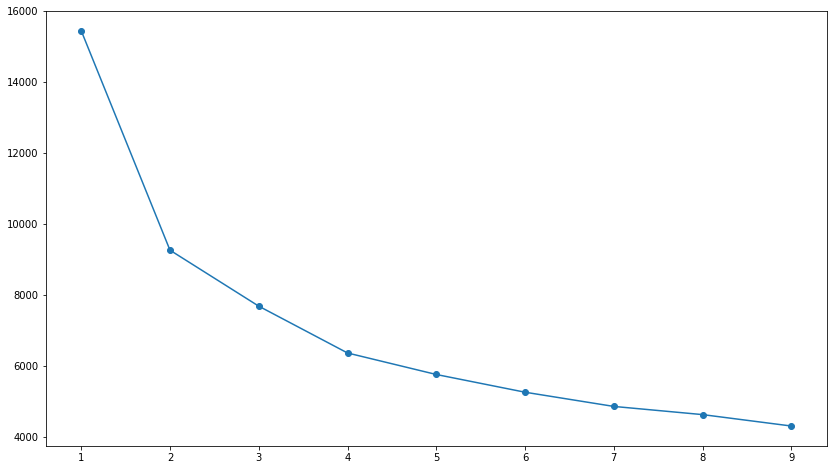

In [11]:
# Elbow plot

plt.figure(figsize=(14,8))
plt.plot( distortion.num_clusters, distortion.cluster_errors, marker = "o" )

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

####  Answer: Optimum k value as per the above elbow plot is 4 but even based on data we have only 3 categorical values in the class "car", "van" and "bus"

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [12]:
# Optimal value of K
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(vehicledata_z)
labels = kmeans.predict(vehicledata_z)

# Cluster centroids
centroids = kmeans.cluster_centers_
print(kmeans.cluster_centers_) 

[[ 1.15063017e+00  1.18492237e+00  1.21372045e+00  9.72856669e-01
   9.24701570e-02  2.20330516e-01  1.29702324e+00 -1.21324488e+00
   1.30032558e+00  1.09911438e+00  1.20602799e+00  1.30784934e+00
   1.09483963e+00 -1.11538437e-01  1.69914670e-01  2.66641298e-01
   2.76491851e-03  1.91911857e-01 -6.85862367e-01]
 [-8.77842942e-01 -4.87082285e-01 -8.33243548e-01 -1.01885144e+00
  -4.88162169e-01 -2.77906176e-01 -7.65580455e-01  8.37279274e-01
  -7.37075016e-01 -4.45540016e-01 -7.79698040e-01 -7.69492355e-01
  -3.75855523e-01  6.77679177e-01 -1.02397212e-01 -3.13702952e-01
  -9.51147942e-01 -9.87225000e-01  4.56784704e-01]
 [-1.85231303e-01 -6.17956232e-01 -2.99495734e-01  8.80686710e-03
   1.91534803e-01 -1.82593508e-01 -4.33875136e-01  2.89588900e-01
  -4.63848913e-01 -5.85465091e-01 -4.00734470e-01 -4.38501611e-01
  -6.46951833e-01 -6.95858939e-01 -4.89325907e-02  6.55525700e-02
   9.38229671e-01  7.92295772e-01  1.51763055e-01]
 [-7.33024343e-01  7.27349604e-02 -2.72170954e-01  2.94

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [13]:
centroids_df = pd.DataFrame()

In [14]:
centroids_df["columns"] = vehicledata_z.columns

In [15]:
for i in range(1,4):
    centroids_df['cluster_'+str(i)] = centroids[i]

Hint: Use pd.Dataframe function 

In [16]:
centroids_df

,columns,cluster_1,cluster_2,cluster_3
0,compactness,-0.877843,-0.185231,-0.733024
1,circularity,-0.487082,-0.617956,0.072735
2,distance_circularity,-0.833244,-0.299496,-0.272171
3,radius_ratio,-1.018851,0.008807,2.947683
4,pr.axis_aspect_ratio,-0.488162,0.191535,6.836652
5,max.length_aspect_ratio,-0.277906,-0.182594,8.696706
6,scatter_ratio,-0.765580,-0.433875,-0.535008
7,elongatedness,0.837279,0.289589,0.466248
8,pr.axis_rectangularity,-0.737075,-0.463849,-0.557406
9,max.length_rectangularity,-0.445540,-0.585465,0.283411


### Use kmeans.labels_ function to print out the labels of the classes

In [17]:
kmeans.labels_

array([2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 1, 1, 2, 2, 0,
       2, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0,
       2, 1, 2, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 1, 1, 0,
       1, 1, 0, 1, 3, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 0, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 3, 1, 2, 1, 2, 2, 0,
       1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 1, 0, 2, 1, 0, 0,
       2, 0, 1, 1, 0, 0, 2, 0, 1, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 0,
       2, 0, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 2,
       0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2,
       0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1,
       2, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 1,
       1, 0, 1, 1, 3, 1, 2, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 0, 2, 1,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [18]:
a = np.random.multivariate_normal([20, 0], [[4, 2], [2, 6]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[4, 2], [1, 4]], size=[50,])
c = np.random.multivariate_normal([30, 40], [[4, 2], [2, 6]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [19]:
a_df = pd.DataFrame(a, columns=list('xy'))
b_df = pd.DataFrame(b, columns=list('xy'))
c_df = pd.DataFrame(c, columns=list('xy'))

In [20]:
a_df.head()
b_df.head()
c_df.head()

,x,y
0,19.498191,2.330584
1,22.115106,2.844047
2,20.071138,1.791939
3,21.724063,4.718390
4,21.987558,3.393375


,x,y
0,0.778647,19.329105
1,1.133564,20.667183
2,3.581172,23.177881
3,1.764547,21.000683
4,-0.442819,17.018426


,x,y
0,30.369198,39.332560
1,29.524345,39.651399
2,30.767399,37.393182
3,27.212488,36.883602
4,30.439457,41.409394


In [21]:
data = pd.concat([a_df,b_df,c_df])

### 10. Use scatter matrix to print all the 3 distributions

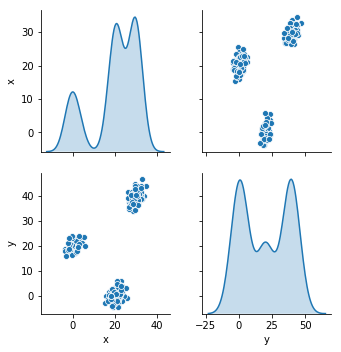

In [22]:
#plt.rcParams['figure.figsize'] = (20, 12)
#plt.style.use('ggplot')
#plt.scatter(data['x'].values, data['y'].values, c='black', s=7)

sns.pairplot(data,diag_kind='kde')

### 11. Find out the linkage matrix

In [23]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

In [24]:
Z = linkage(data, 'ward', metric='euclidean')
c, coph_dists = cophenet(Z , pdist(data))

c

0.9728707987879074

In [25]:
Z

array([[2.23000000e+02, 2.27000000e+02, 1.94140658e-02, 2.00000000e+00],
       [1.61000000e+02, 2.31000000e+02, 5.74816829e-02, 2.00000000e+00],
       [2.30000000e+01, 9.10000000e+01, 7.28446140e-02, 2.00000000e+00],
       [1.06000000e+02, 1.41000000e+02, 8.04341361e-02, 2.00000000e+00],
       [2.02000000e+02, 2.32000000e+02, 8.45080583e-02, 2.00000000e+00],
       [1.08000000e+02, 1.32000000e+02, 9.56893712e-02, 2.00000000e+00],
       [4.30000000e+01, 8.90000000e+01, 1.04980707e-01, 2.00000000e+00],
       [8.80000000e+01, 9.90000000e+01, 1.26909547e-01, 2.00000000e+00],
       [2.40000000e+01, 7.40000000e+01, 1.29555423e-01, 2.00000000e+00],
       [1.51000000e+02, 2.50000000e+02, 1.39727535e-01, 3.00000000e+00],
       [1.07000000e+02, 1.28000000e+02, 1.43339271e-01, 2.00000000e+00],
       [4.90000000e+01, 8.20000000e+01, 1.46679797e-01, 2.00000000e+00],
       [7.10000000e+01, 8.40000000e+01, 1.60599636e-01, 2.00000000e+00],
       [1.58000000e+02, 2.46000000e+02, 1.64175222e

Use ward as linkage metric and distance as Eucledian

### 12. Plot the dendrogram for the consolidated dataframe

<Figure size 720x720 with 0 Axes>

Text(0.5,1,'Agglomerative Hierarchical Clustering Dendogram')

Text(0.5,0,'sample index')

Text(0,0.5,'Distance')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [10.0, 10.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [80.0, 80.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [125.0, 125.0, 150.0, 150.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [175.0, 175.0, 193.75, 193.75],
  [225.0, 225.0, 235.0, 235.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [230.0, 230.0, 253.75, 253.75],
  [184.375, 184.375, 241.875, 241.875],
  [137.5, 137.5, 213.125, 213.125],
  [95.0, 95.0, 175.3125, 175.3125],
  [25.0, 25.0, 135.15625, 135.15625],
  [285.0, 285.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [335.0, 335.0, 345.0, 345.0],
  [375.0

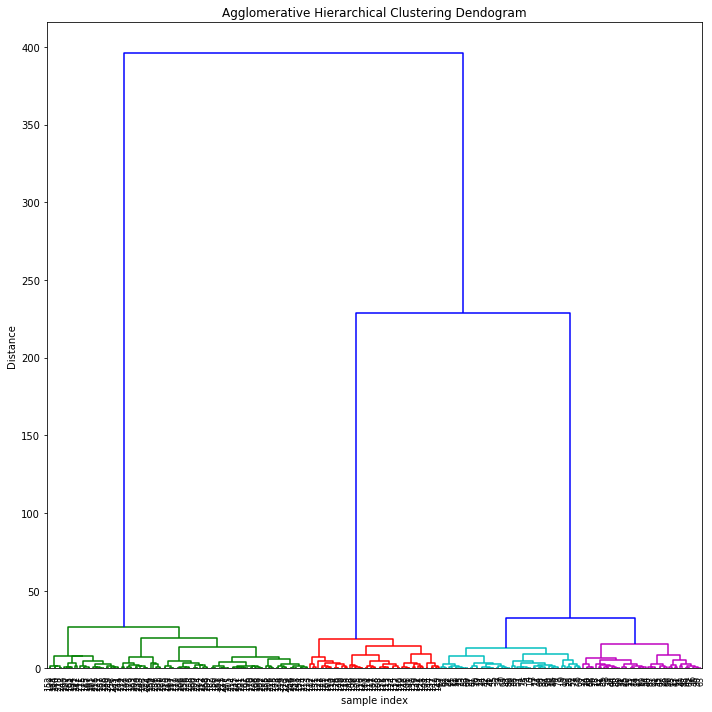

In [26]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

<Figure size 720x720 with 0 Axes>

Text(0.5,1,'Agglomerative Hierarchical Clustering Dendogram')

Text(0.5,0,'sample index')

Text(0,0.5,'Distance')

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [70.0, 70.0, 92.5, 92.5],
  [50.0, 50.0, 81.25, 81.25],
  [13.75, 13.75, 65.625, 65.625],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [175.0, 175.0, 185.0, 185.0],
  [152.5, 152.5, 180.0, 180.0],
  [122.5, 122.5, 166.25, 166.25],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [200.0, 200.0, 222.5, 222.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [252.5, 252.5, 282.5, 282.5],
  [211.25, 211.25, 267.5, 267.5],
  [144.375, 144.375, 239.375, 239.375],
  [39.6875, 39.6875, 191.875, 191.875]],
 'dcoord': [[0.0, 5.045499286099949, 5.045499286099949, 0.0],
  [0.0, 7

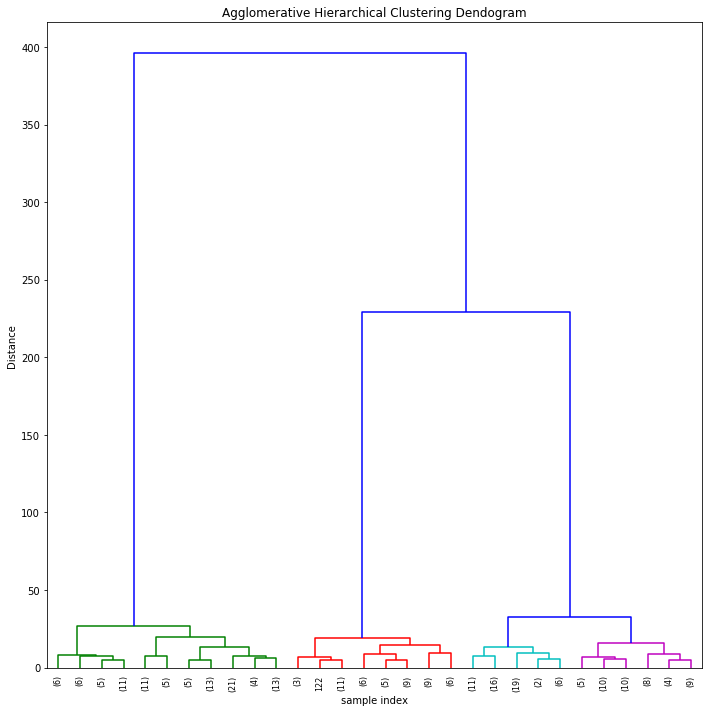

In [27]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8., truncate_mode='lastp' )
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

### From the above observations in the above dendogram we can confirm that at the distance = 50 we can draw the line to cut the clusters where we can see the maximum distance between the clusters

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [28]:
groupes_cah = fcluster(Z,t=50,criterion='distance')
print(groupes_cah)
len(groupes_cah)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


250

### Use matplotlib to visually observe the clusters in 2D space 

In [29]:
data["group"] = groupes_cah
data.head()

,x,y,group
0,19.498191,2.330584,3
1,22.115106,2.844047,3
2,20.071138,1.791939,3
3,21.724063,4.718390,3
4,21.987558,3.393375,3


AxesSubplot(0.125,0.125;0.775x0.755)


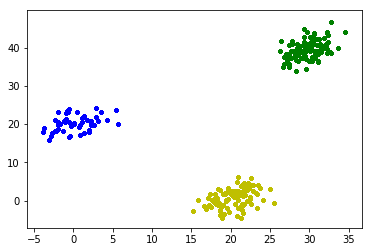

In [30]:
import matplotlib.pyplot as plt

colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
print(ax)
c = np.array([3,3])

for i in groupes_cah:
        points = np.array(data.loc[data['group'] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
